In [6]:
import requests
import json
import pandas as pd
import networkx as nx
import numpy as np
from scipy.spatial.distance import hamming
from itertools import combinations

In [7]:
dataset_url = "https://raw.githubusercontent.com/tangqiaoyu/ToolAlpaca/refs/heads/main/data/train_data.json"
response = requests.get(dataset_url)
data = json.loads(response.text)

df = pd.DataFrame(data)
functions_data = df.loc[16:30, "Functions"].tolist()

formatted_json = json.dumps(functions_data, indent=4, ensure_ascii=False)
print(formatted_json)
[
    [[1], [2], [3]],
    [[2, 1], [2, 2], [2, 3], [2, 4]],
    [[1, 2], [2, 1]],
    [[3, 1], [1, 2], [1, 4], [1, 5], [1, 6], [1, 7]],
    [[4, 3], [2, 1], [2, 6], [5, 1], [5, 6]],
]

[
    "1. Name: getFavicon\nDescription: Retrieves the favicon image for a given website.\nInput: {\"url\": \"Required. String. The URL of the website for which the favicon is to be retrieved.\"}\nOutput: Returns the favicon image in the format specified (default is .ico) and a URL to access the favicon image.\n\n2. Name: getFaviconWithFallback\nDescription: Retrieves the favicon image for a given website, with a fallback image if the favicon is not available.\nInput: {\"url\": \"Required. String. The URL of the website for which the favicon is to be retrieved.\", \"fallback\": \"Optional. String. The URL of the fallback image to be used if the favicon is not available.\"}\nOutput: Returns the favicon image in the format specified (default is .ico) and a URL to access the favicon image. If the favicon is not available, the fallback image will be returned instead.\n\n3. Name: customizeFavicon\nDescription: Retrieves and customizes the favicon image for a given website with additional pa

[[[1], [2], [3]],
 [[2, 1], [2, 2], [2, 3], [2, 4]],
 [[1, 2], [2, 1]],
 [[3, 1], [1, 2], [1, 4], [1, 5], [1, 6], [1, 7]],
 [[4, 3], [2, 1], [2, 6], [5, 1], [5, 6]]]

In [10]:
def adjacency_matrix_similarity(G1, G2):
    """
    Сравнение графов на основе их матриц смежности.
    Возвращает долю совпадающих элементов.
    """
    A1 = nx.adjacency_matrix(G1).todense()
    A2 = nx.adjacency_matrix(G2).todense()

    if A1.shape != A2.shape:
        return 0

    return np.sum(A1 == A2) / A1.size


def degree_distribution_similarity(G1, G2):
    """
    Сравнение графов на основе распределения степеней вершин.
    Используется косинусное сходство.
    """
    deg1 = sorted([d for n, d in G1.out_degree()])
    deg2 = sorted([d for n, d in G2.out_degree()])

    if len(deg1) != len(deg2):
        return 0

    dot_product = np.dot(deg1, deg2)
    norm1 = np.linalg.norm(deg1)
    norm2 = np.linalg.norm(deg2)

    return dot_product / (norm1 * norm2)


def hamming_distance_similarity(G1, G2):
    """
    Сравнение графов на основе расстояния Хэмминга между векторами ребер.
    """
    A1 = nx.adjacency_matrix(G1).todense().flatten()
    A2 = nx.adjacency_matrix(G2).todense().flatten()

    if A1.shape != A2.shape:
        return 0

    return 1 - hamming(A1, A2)


def jaccard_similarity(G1, G2):
    """
    Сравнение графов на основе коэффициента Жаккара для множеств рёбер.
    """
    edges1 = set(G1.edges())
    edges2 = set(G2.edges())

    intersection = len(edges1 & edges2)
    union = len(edges1 | edges2)

    return intersection / union if union > 0 else 0


def spectral_similarity(G1, G2):
    """
    Сравнение графов на основе их спектральных характеристик (собственных значений).
    """
    L1 = nx.laplacian_matrix(G1).todense()
    L2 = nx.laplacian_matrix(G2).todense()

    if L1.shape != L2.shape:
        return 0

    eigvals1 = np.linalg.eigvals(L1)
    eigvals2 = np.linalg.eigvals(L2)

    return np.linalg.norm(np.sort(eigvals1) - np.sort(eigvals2))


def graph_edit_distance_similarity(G1, G2):
    """
    Сравнение графов с использованием расстояния редактирования графа.
    """
    try:
        ged = nx.graph_edit_distance(G1, G2)
        return 1 / (1 + ged)
    except nx.NetworkXError:
        return 0


def create_directed_graph(edges, nodes):
    graph = nx.DiGraph()
    graph.add_nodes_from(nodes)

    for edge in edges:
        source, target = edge
        graph.add_edge(source, target, weight=1)

    return graph


def create_weighted_directed_graph(edges, nodes):
    graph = nx.DiGraph()
    graph.add_nodes_from(nodes)

    for edge in edges:
        source, target, _, weight = edge
        graph.add_edge(source, target, weight=weight)

    return graph


if __name__ == "__main__":
    edges = [
        # [[1], [2], [3]],
        [],
        [[2, 1], [2, 2], [2, 3], [2, 4]],
        [[1, 2], [2, 1]],
        [[3, 1], [1, 2], [1, 4], [1, 5], [1, 6], [1, 7]],
        [[4, 3], [2, 1], [2, 6], [5, 1], [5, 6]],
    ]
    nodes = [[1, 2, 3], [1, 2, 3, 4], [1, 2], [1, 2, 3, 4, 5, 6, 7], [1, 2, 3, 4, 5, 6]]
    for i in range(5):
        G1 = create_directed_graph(edges[i], nodes[i])
        G2 = create_weighted_directed_graph(
            [
                [1, 4, "query", 0.5381122],
                [4, 1, "query", 0.59862816],
                [6, 1, "foodItemId", 0.5145686],
            ],
            [1, 2, 3, 4, 5, 6],
        )

        print("Adjacency Matrix Similarity:", adjacency_matrix_similarity(G1, G2))
        print("Degree Distribution Similarity:", degree_distribution_similarity(G1, G2))
        print("Hamming Distance Similarity:", hamming_distance_similarity(G1, G2))
        print("Jaccard Similarity:", jaccard_similarity(G1, G2))
        print("Spectral Similarity:", spectral_similarity(G1, G2))
        print("Graph Edit Distance Similarity:", graph_edit_distance_similarity(G1, G2))
        print("----------------------------")

Adjacency Matrix Similarity: 0
Degree Distribution Similarity: 0
Hamming Distance Similarity: 0
Jaccard Similarity: 0.0
Spectral Similarity: 0
Graph Edit Distance Similarity: 0.14285714285714285
----------------------------
Adjacency Matrix Similarity: 0
Degree Distribution Similarity: 0
Hamming Distance Similarity: 0
Jaccard Similarity: 0.0
Spectral Similarity: 0
Graph Edit Distance Similarity: 0.16666666666666666
----------------------------
Adjacency Matrix Similarity: 0
Degree Distribution Similarity: 0
Hamming Distance Similarity: 0
Jaccard Similarity: 0.0
Spectral Similarity: 0
Graph Edit Distance Similarity: 0.16666666666666666
----------------------------
Adjacency Matrix Similarity: 0
Degree Distribution Similarity: 0
Hamming Distance Similarity: 0
Jaccard Similarity: 0.125
Spectral Similarity: 0
Graph Edit Distance Similarity: 0.14285714285714285
----------------------------
Adjacency Matrix Similarity: 0.7777777777777778
Degree Distribution Similarity: 0.9622504486493763
Ham

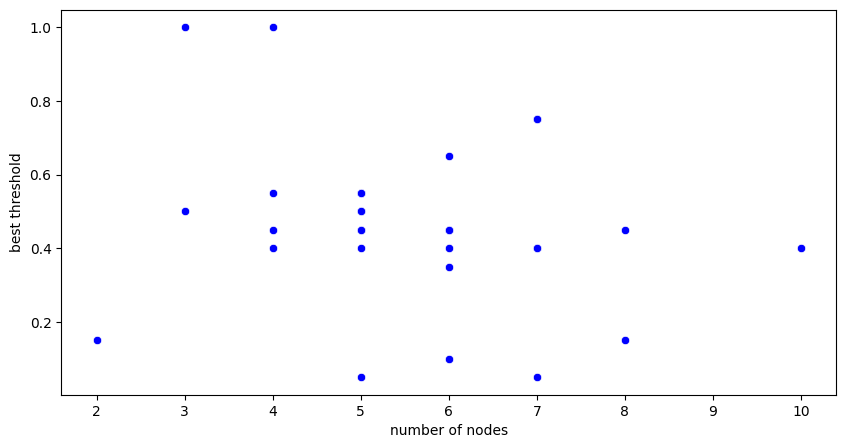

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

a = [
    3,
    4,
    2,
    7,
    6,
    6,
    5,
    10,
    7,
    6,
    7,
    4,
    3,
    8,
    4,
    4,
    8,
    6,
    5,
    5,
    7,
    5,
    5,
    6,
    7,
    5,
    5,
    6,
    5,
    5,
]
b = [
    1.0,
    0.45,
    0.15000000000000002,
    0.75,
    0.35000000000000003,
    0.4,
    0.4,
    0.4,
    0.4,
    0.65,
    0.05,
    0.55,
    0.5,
    0.15000000000000002,
    1.0,
    0.4,
    0.45,
    0.45,
    0.55,
    0.45,
    0.4,
    0.5,
    0.45,
    0.45,
    0.75,
    0.55,
    0.05,
    0.1,
    0.55,
    0.5,
]
a1 = [
    3,
    4,
    2,
    7,
    6,
    6,
    5,
    10,
    7,
    6,
    7,
    4,
    3,
    8,
    4,
    4,
    8,
    6,
    5,
    5,
    7,
    5,
    5,
    6,
    7,
    5,
    5,
    6,
    5,
    5,
]
b1 = [
    1.0,
    1.0,
    0.15000000000000002,
    0.75,
    0.7000000000000001,
    0.5,
    0.7000000000000001,
    0.75,
    0.8500000000000001,
    0.7000000000000001,
    0.9500000000000001,
    0.6000000000000001,
    0.55,
    1.0,
    0.9500000000000001,
    0.9500000000000001,
    0.9,
    0.8500000000000001,
    0.9,
    0.75,
    0.7000000000000001,
    0.9,
    0.9,
    0.9,
    0.8500000000000001,
    0.9,
    0.9500000000000001,
    1.0,
    0.9500000000000001,
    0.8500000000000001,
]
plt.figure(figsize=(10, 5))
sns.scatterplot(x=a, y=b, color="b")
plt.xlabel("number of nodes")
plt.ylabel("best threshold")
plt.show()